In [1]:
from importlib import reload
import mdps
import q_learning
reload(q_learning)
reload(mdps)
from q_learning import QLearn
from mdps.latency import MDPLatency
import matplotlib.pyplot as plt
import numpy as np

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define MDP

In [2]:
NUM_STATES = 10

mdp = MDPLatency(NUM_STATES)

In [3]:
EPISODES = 30000
EPSILON = 0.1
GAMMA = 1

In [4]:
q_learn_mdp = QLearn(mdp, epsilon=EPSILON, episodes=EPISODES)
q_learn_mdp.reset()
q_learn_mdp.execute()

q_learn_mdp.show_optimal()

  0%|          | 11/30000 [00:00<05:09, 96.82it/s]

  0%|          | 122/30000 [00:01<03:48, 130.53it/s]

s: 1, a: 1, Q_p: 0.42777063442936347, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.42777031657256803, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.42777009871609045, Q_r: 0.8447761323199037
RANDOM!  0
s: 1, a: 0, Q_p: 0.42776998085983076, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277699630036889, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277700451475649, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277702272913587, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277705094349704, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277708915783, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277713737212474, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277719558637127, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.42777263800559584, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277734201467968, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277743022872157, Q_r: 0.8447761323199037
s: 1, a: 0, Q_p: 0.4277752844267524, Q_r: 0.8447761323199037
RANDOM!  1
s: 2, a: 1, Q_p: 0.009913838999524005, Q_r: 0.121569120783114

100%|██████████| 30000/30000 [01:09<00:00, 428.68it/s] 

Optimal Q: [[0.54388681 0.27836939]
 [0.84477774 0.84477613]
 [0.12278132 0.12156912]
 [0.82585295 0.82585276]
 [0.5750935  0.57509333]
 [0.89024789 0.20920212]
 [0.18629674 0.10837689]
 [0.97862381 0.97862378]
 [0.81098758 0.17194101]
 [0.81503347 0.27070161]
 [0.         0.        ]]
Optimal Policy: [1 1 1 1 1 1 1 1 1 1 0]


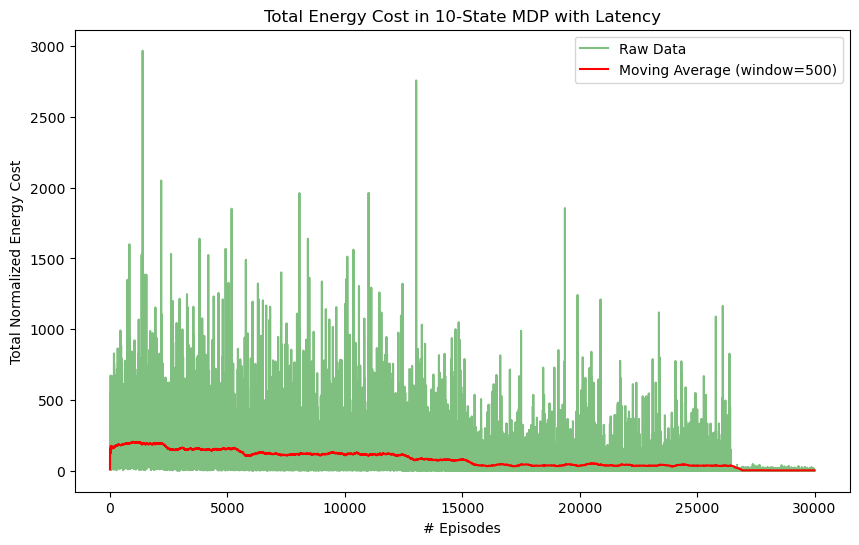

In [5]:
q_learn_mdp.plot_rewards(title=f"Total Energy Cost in {NUM_STATES}-State MDP with Latency",
                         xaxis_title="# Episodes",
                         yaxis_title="Total Normalized Energy Cost"
                         )

# With MDP with cost and no latency there is no cost for pausing and only rewrad.
#   This means that the plot for that case is significantly lower.

# This plot shows massive cost, but it is more realistic as it does complete at some point
# However, the loss cost should also be considered a normalized energy cost.
#   -> What if we select minimum energy cost?